In [94]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [84]:
yi, yf = xi, xf = (0, 1)
h = 0.02

a = 0.00028
b = 0.005
tau = 0.1
k = -0.005

lim_yi = lim_yf = 0
lim_xi = lim_xf = 0

tf = 10
dt = 0.01

In [105]:
def nablasq(fun,h):
    for i in range(0,fun.shape[0]-1):
        for j in range(0,fun.shape[1]-1):
            res = (fun[i+1,j]+fun[i-1,j]+fun[i,j+1]+fun[i,j-1]-4*fun[i,j])/(h**2)
    return res

In [106]:
x, y = np.meshgrid(np.arange(xi, xf+h, h),
                   np.arange(yi, yf+h, h))

phi = np.random.rand(x.shape[0], x.shape[1])
psi = np.random.rand(x.shape[0], x.shape[1])

phi[0,:] = phi[:,0] = phi[-1,:] = phi[:,-1] = 0
psi[0,:] = psi[:,0] = psi[-1,:] = psi[:,-1] = 0

In [107]:
for t in np.arange(0+dt,tf,dt):
    clear_output(wait=True)
    for fun in (phi,psi):
        fun[0,:] = fun[1,:]
        fun[-1,:] = fun[-2,:]
        fun[:,0] = fun[:,1]
        fun[:,-1] = fun[:,-2]
    
    phidt = phi + dt*(a*nablasq(phi,h)+phi-(phi**3)-psi+k)
    psidt = psi + dt*(b*nablasq(phi,h)+phi-psi)/tau

    psi = psidt
    phi = phidt

    plt.imshow(phi+psi, cmap='BuPu', interpolation='bilinear')
    plt.colorbar()
    plt.show()
    print(t)


KeyboardInterrupt: 

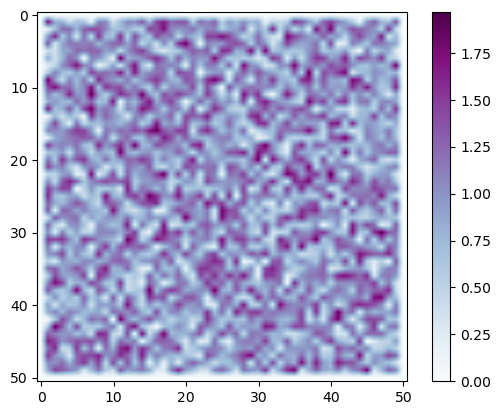

In [102]:
plt.imshow(phi+psi, cmap='BuPu', interpolation='bilinear')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

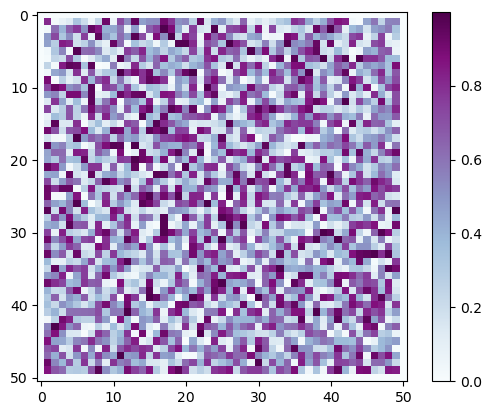

In [103]:
plt.imshow(phi, cmap='BuPu')
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

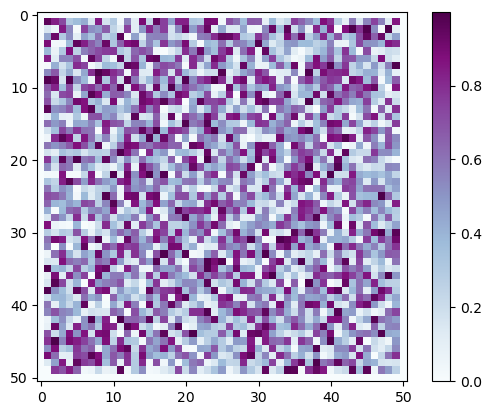

In [104]:
plt.imshow(psi, cmap='BuPu')
plt.colorbar()
plt.show